In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from wordcloud import WordCloud
import networkx as nx

df = pd.read_csv(r"C:\Users\USER\Downloads\25_june_isrc_final.csv")
df.head(5)



,ISRC,Chartmetric ID,Track Name,Artists,Tags,Genres,Genre IDs,Moods,Activities
0,INZ031415512,134320626.0,"Dobara Humein Kya - From ""Auron Mein Kahan Dum...","M. M. Kreem, Jubin Nautiyal, Sunidhi Chauhan",bollywood,bollywood,501219,"ROMANTIC, DARK",NaN
1,INS181303031,17063542.0,Tum Hi Ho,"Mithoon, Arijit Singh","bollywood, pakistani fusion, south asian class...","bollywood, south asian classical, indian fusio...","501219, 503287, 507684, 507743, 507755","affectionate, emotional, dramatic, heartwarmin...","sleep, soft, lofi, study"
2,INS182402832,137371544.0,"Raanjhan (From ""Do Patti"")","Parampara Tandon, Sachet-Parampara, Kausar Munir","bollywood, new romantic, pakistani fusion, sou...","bollywood, south asian classical, new romantic...","501219, 503287, 507743, 507755","betrayal, longing, melancholic, wistful","soft, lofi"
3,INH102500536,142519267.0,"Tu Hain Toh Main Hoon (From ""Sky Force"")","Tanishk Bagchi, Arijit Singh, Afsana Khan, Irs...","bollywood, haryanvi, punjabi, new romantic","bollywood, haryanvi, punjabi, new romantic","501219, 501514, 501717, 507743","affectionate, devoted, uplifting, heartwarming...","soft, sleep"
4,INH102409256,131161883.0,"Aaj Ki Raat (From ""Stree 2"")","Sachin-Jigar, Madhubanti Bagchi, Divya Kumar, ...","indian fusion, new romantic, indian pop, bolly...","bollywood, indian pop, south asian classical, ...","501219, 501220, 503287, 507684, 507743, 507755","chill, happy, soulful, fun, family, energetic","late-night, self-love"


Enter artist name:  Arijit Singh 



ARTIST SIMILARITY ANALYSIS FOR: Arijit Singh

Top 10 Artists Most Similar to 'Arijit Singh':
Rank  Artist                              Similarity   Distance  
-----------------------------------------------------------------
1     Pritam, Arijit Singh                0.9585       0.0415    
2     Mithoon, Arijit Singh               0.9345       0.0655    
3     Darshan Raval                       0.9319       0.0681    
4     Pritam, Darshan Raval, Antara Mitra 0.9098       0.0902    
5     Pritam, Arijit Singh, Amitabh Bhattacharya 0.9079       0.0921    
6     Pritam, KK                          0.9074       0.0926    
7     Amaal Mallik, Armaan Malik          0.9037       0.0963    
8     Meet Bros., Roach Killa, Khushboo Grewal, Arijit Singh 0.8982       0.1018    
9     Gurnazar, Asees Kaur                0.8926       0.1074    
10    Arijit Singh, Mujtaba Aziz Naza, Altamash Faridi, Farhan Sabri 0.8890       0.1110    

GENERATING VISUALIZATIONS...


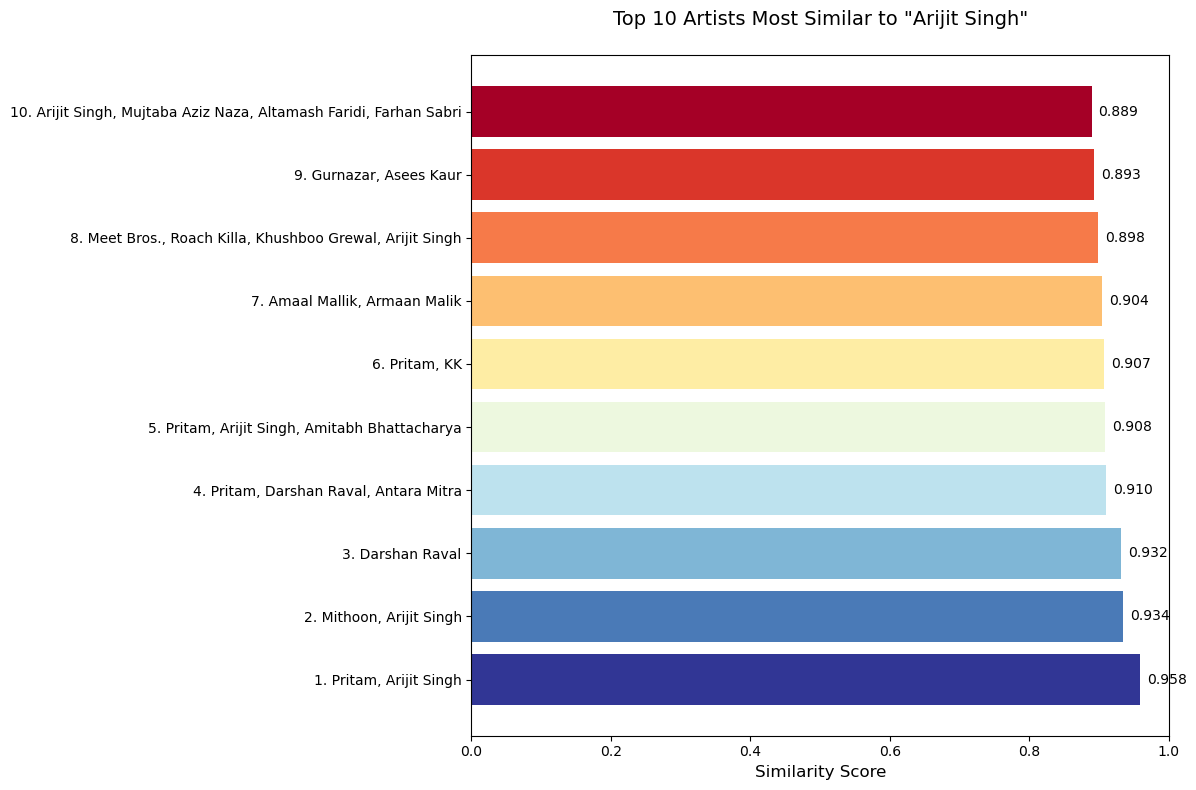

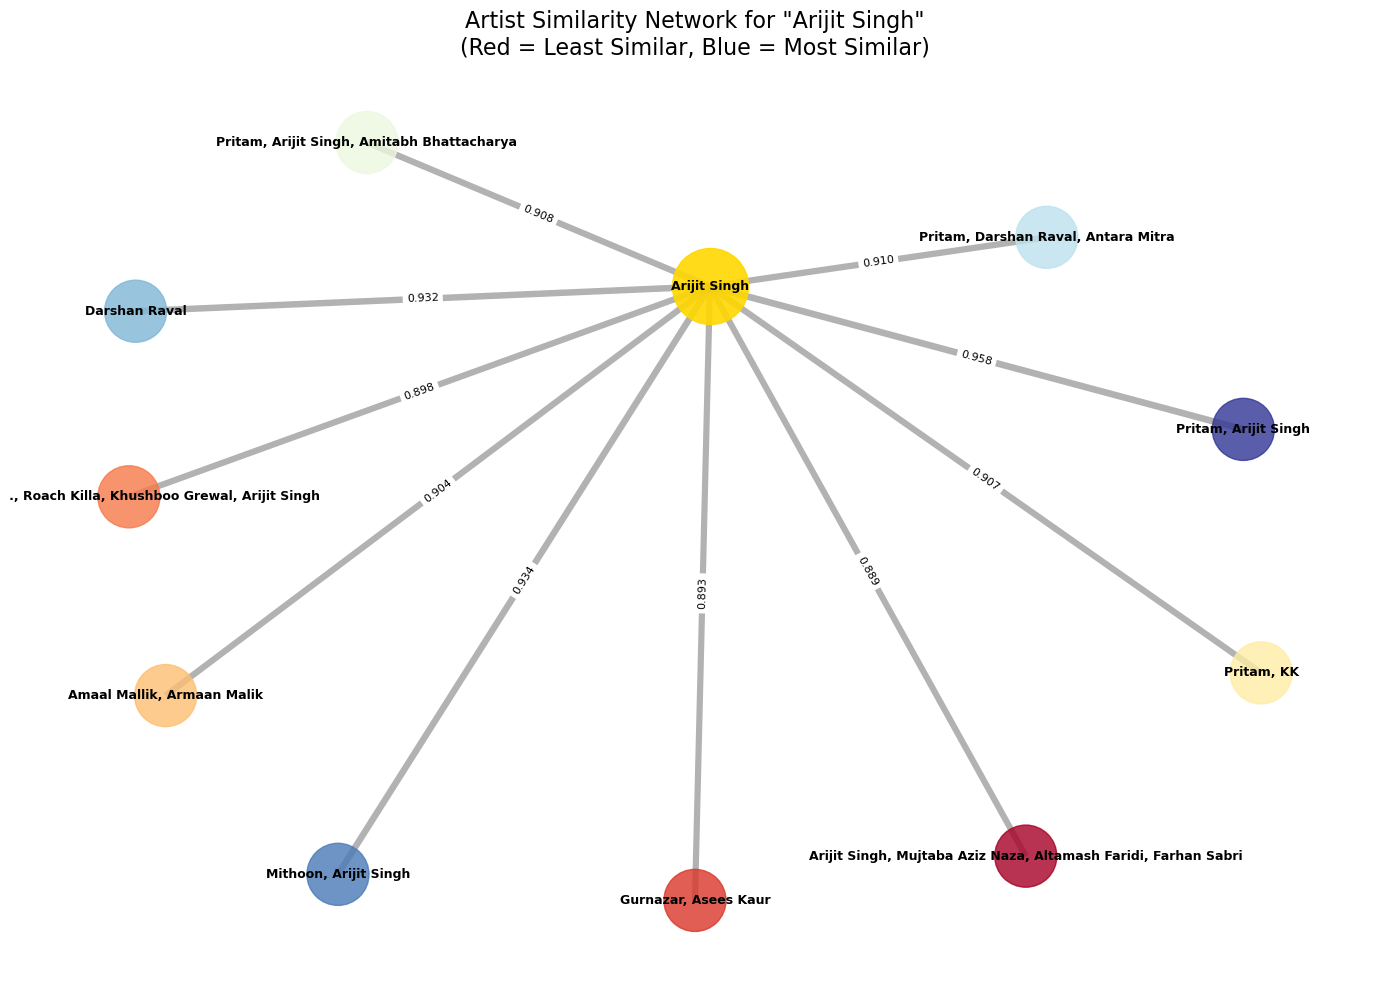

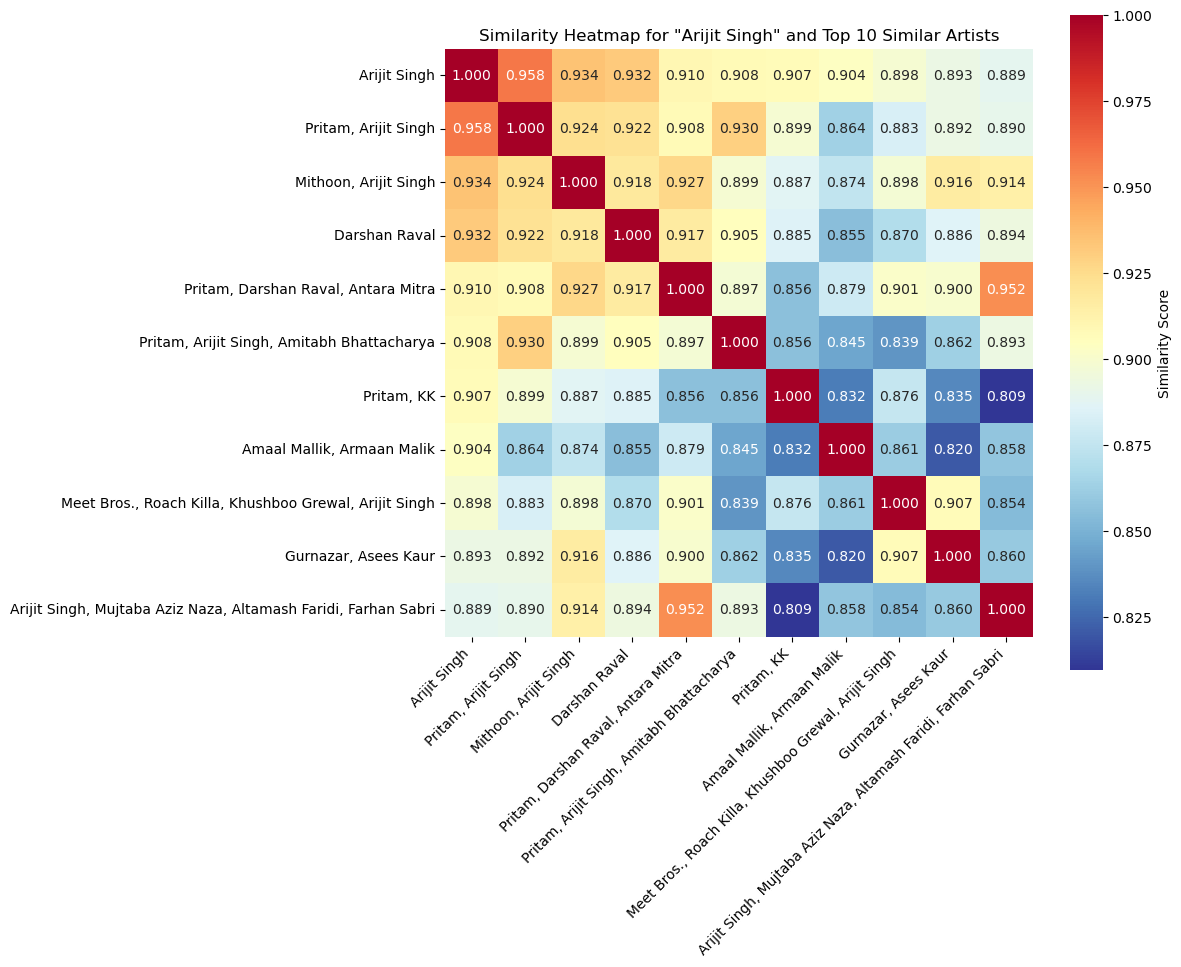


✅ All visualizations saved as PNG files!
📁 Files created:
   - similarity_ranking_Arijit Singh.png
   - similarity_network_Arijit Singh.png
   - similarity_heatmap_Arijit Singh.png


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
from wordcloud import WordCloud
import networkx as nx
import seaborn as sns

df = pd.read_csv(r"C:\Users\USER\Downloads\25_june_isrc_final.csv")

artist_name = input("Enter artist name: ").strip()


required = ['Artists', 'Track Name', 'Genres', 'Moods']
for col in required:
    if col not in df.columns:
        raise ValueError(f"Missing column: {col}")

df['Tags'] = df['Genres'].astype(str) + ', ' + df['Moods'].astype(str)


artist_tags = df.groupby('Artists')['Tags'].apply(lambda x: ' '.join(x)).reset_index()
vectorizer = TfidfVectorizer(stop_words='english')
tag_vectors = vectorizer.fit_transform(artist_tags['Tags'])


similarity_matrix = cosine_similarity(tag_vectors)

def get_similar_artists(artist_name, top_n=10):
    if artist_name not in artist_tags['Artists'].values:
        return f"Artist '{artist_name}' not found in data."
 
    artist_idx = artist_tags.index[artist_tags['Artists'] == artist_name][0]
    
    
    similarities = similarity_matrix[artist_idx]
   
    similar_indices = np.argsort(-similarities)
    similar_data = []
    
    for i, idx in enumerate(similar_indices):
        if idx == artist_idx: 
            continue
        if len(similar_data) >= top_n:
            break
        similar_data.append({
            'rank': len(similar_data) + 1,
            'artist': artist_tags['Artists'][idx],
            'similarity': similarities[idx],
            'distance': 1 - similarities[idx]  # Convert to distance
        })
    
    return similar_data

def plot_similarity_ranking(artist_name):
    similar_artists = get_similar_artists(artist_name, 10)
    
    if isinstance(similar_artists, str):
        print(similar_artists)
        return
    
    similarities = [artist['similarity'] for artist in similar_artists]
    colors = plt.cm.RdYlBu_r(np.linspace(0, 1, len(similarities)))
    
  
    fig, ax = plt.subplots(figsize=(12, 8))
    
    artists = [artist['artist'] for artist in similar_artists]
    scores = [artist['similarity'] for artist in similar_artists]
    
    bars = ax.barh(range(len(artists)), scores, color=colors)
    
   
    ax.set_yticks(range(len(artists)))
    ax.set_yticklabels([f"{i+1}. {artist}" for i, artist in enumerate(artists)])
    ax.set_xlabel('Similarity Score', fontsize=12)
    ax.set_title(f'Top 10 Artists Most Similar to "{artist_name}"\n', fontsize=14)
    ax.set_xlim(0, 1)
    
   
    for i, (bar, score) in enumerate(zip(bars, scores)):
        ax.text(score + 0.01, i, f'{score:.3f}', va='center', fontsize=10)
    
    plt.tight_layout()
    plt.savefig(f'similarity_ranking_{artist_name}.png', dpi=300, bbox_inches='tight')
    plt.show()

def plot_similarity_network_colored(artist_name):
    similar_artists = get_similar_artists(artist_name, 10)
    
    if isinstance(similar_artists, str):
        print(similar_artists)
        return
    
   
    G = nx.Graph()
    G.add_node(artist_name)
    
    for artist_data in similar_artists:
        artist = artist_data['artist']
        similarity = artist_data['similarity']
        G.add_node(artist)
        G.add_edge(artist_name, artist, weight=similarity)
    
    pos = nx.spring_layout(G, k=3, iterations=50, seed=42)
    
   
    plt.figure(figsize=(14, 10))
    
    
    nx.draw_networkx_nodes(G, pos, nodelist=[artist_name], 
                          node_color='gold', node_size=3000, alpha=0.9)
    
    similar_artist_names = [artist_data['artist'] for artist_data in similar_artists]
    similarities = [artist_data['similarity'] for artist_data in similar_artists]
    colors = plt.cm.RdYlBu_r(np.linspace(0, 1, len(similarities)))
    
    nx.draw_networkx_nodes(G, pos, nodelist=similar_artist_names,
                          node_color=colors, node_size=2000, alpha=0.8)
    
    
    edges = [(artist_name, artist_data['artist']) for artist_data in similar_artists]
    edge_weights = [artist_data['similarity'] * 5 for artist_data in similar_artists]
    
    nx.draw_networkx_edges(G, pos, edgelist=edges, width=edge_weights, 
                          alpha=0.6, edge_color='gray')
    
    nx.draw_networkx_labels(G, pos, font_size=9, font_weight='bold')
   
    edge_labels = {(artist_name, artist_data['artist']): f"{artist_data['similarity']:.3f}" 
                   for artist_data in similar_artists}
    nx.draw_networkx_edge_labels(G, pos, edge_labels, font_size=8)
    
    plt.title(f'Artist Similarity Network for "{artist_name}"\n(Red = Least Similar, Blue = Most Similar)', 
              fontsize=16)
    plt.axis('off')
    plt.tight_layout()
    plt.savefig(f'similarity_network_{artist_name}.png', dpi=300, bbox_inches='tight')
    plt.show()

def plot_similarity_heatmap(artist_name):
    similar_artists = get_similar_artists(artist_name, 10)
    
    if isinstance(similar_artists, str):
        print(similar_artists)
        return
    
   
    artist_names = [artist_name] + [artist_data['artist'] for artist_data in similar_artists]
    
  
    indices = [artist_tags.index[artist_tags['Artists'] == name][0] for name in artist_names]
   
    sub_matrix = similarity_matrix[np.ix_(indices, indices)]
    
    plt.figure(figsize=(12, 10))
    sns.heatmap(sub_matrix, 
                xticklabels=artist_names, 
                yticklabels=artist_names,
                annot=True, 
                fmt='.3f', 
                cmap='RdYlBu_r',
                square=True,
                cbar_kws={'label': 'Similarity Score'})
    
    plt.title(f'Similarity Heatmap for "{artist_name}" and Top 10 Similar Artists')
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.savefig(f'similarity_heatmap_{artist_name}.png', dpi=300, bbox_inches='tight')
    plt.show()

print(f"\n{'='*60}")
print(f"ARTIST SIMILARITY ANALYSIS FOR: {artist_name}")
print(f"{'='*60}")

similar_artists = get_similar_artists(artist_name, 10)

if isinstance(similar_artists, str):
    print(similar_artists)
else:
    print(f"\nTop 10 Artists Most Similar to '{artist_name}':")
    print(f"{'Rank':<5} {'Artist':<35} {'Similarity':<12} {'Distance':<10}")
    print("-" * 65)
    
    for artist_data in similar_artists:
        print(f"{artist_data['rank']:<5} {artist_data['artist']:<35} "
              f"{artist_data['similarity']:<12.4f} {artist_data['distance']:<10.4f}")
    
    print(f"\n{'='*60}")
    print("GENERATING VISUALIZATIONS...")
    print(f"{'='*60}")
    
    # Generate all visualizations
    plot_similarity_ranking(artist_name)
    plot_similarity_network_colored(artist_name)
    plot_similarity_heatmap(artist_name)
    
    print(f"\n✅ All visualizations saved as PNG files!")
    print(f"📁 Files created:")
    print(f"   - similarity_ranking_{artist_name}.png")
    print(f"   - similarity_network_{artist_name}.png") 
    print(f"   - similarity_heatmap_{artist_name}.png")
